In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import neighbors
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [3]:
cereal = pd.read_csv('cereal.csv')
display(cereal.head())

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


<Axes: title={'center': 'Distribution of Cereal Data'}, ylabel='Count'>

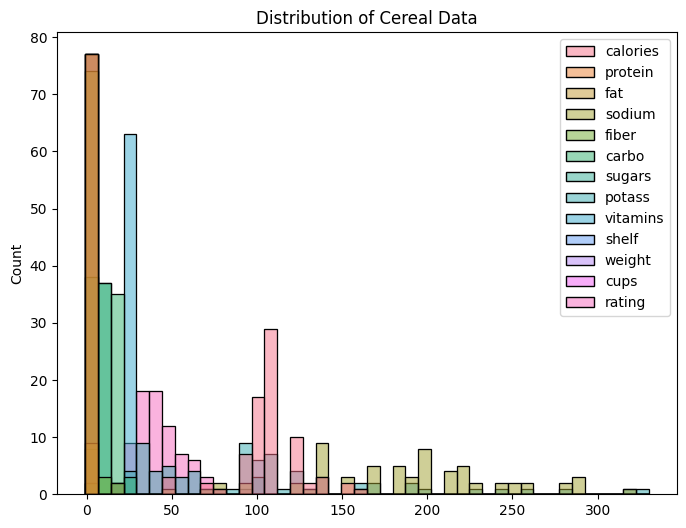

In [5]:
# Create a figure with a specified size (8 inches by 6 inches)
plt.figure(figsize=(8, 6))

# Set the title for the histogram plot
plt.title("Distribution of Cereal Data")

# Create a histogram plot using seaborn for the 'cereal' dataset
sns.histplot(data=cereal)


Our data appears to be right-skewed, indicating a positive skew in the data distribution.

In [43]:
def plot_histogram(column_data, column_name):
    plt.figure(figsize=(5, 3))
    plt.title(f"Distribution of {column_name}")
    sns.histplot(column_data, kde=True, color='purple') 
    plt.show()

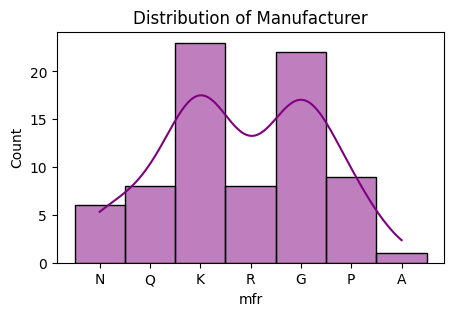

In [44]:
plot_histogram(cereal['mfr'], 'Manufacturer')

The histogram reveals that Kellogs and General Mills are the primary cereal manufacturers in our dataset. This bimodal distribution indicates two prominent peaks, highlighting the dominance of these two manufacturers in our product range.

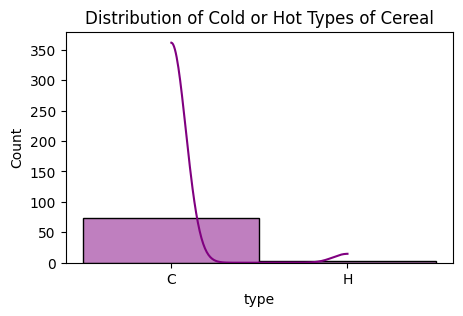

In [45]:
plot_histogram(cereal['type'], 'Cold or Hot Types of Cereal')

Our analysis suggests that the majority of our cereals are designed to be served cold, with fewer options suitable for hot consumption.

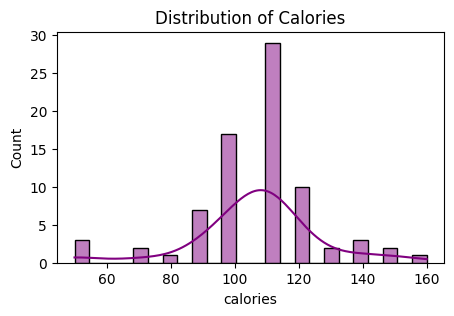

In [46]:
plot_histogram(cereal['calories'], 'Calories')

The distribution of calories in our dataset exhibits a normal distribution, characterized by a bell-shaped curve. Most cereals in our dataset provide around 100-120 calories per serving.

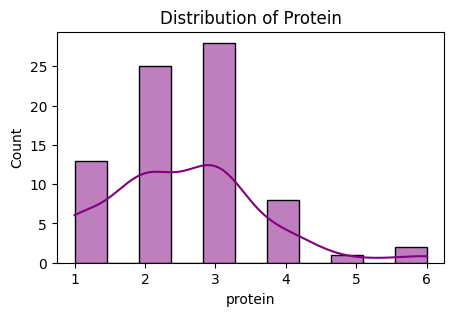

In [47]:
plot_histogram(cereal['protein'], 'Protein')

The distribution of protein content among our products predominantly falls within the range of 2-3 grams, as indicated by our right-skewed histogram.

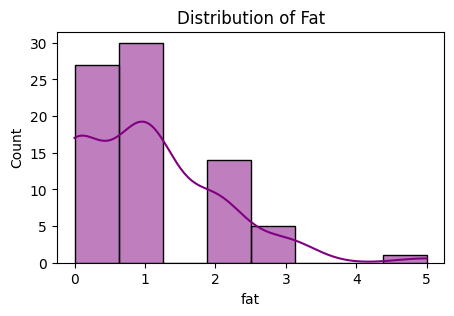

In [48]:
plot_histogram(cereal['fat'], 'Fat')

The distribution of fat content per gram also exhibits a right-skewed pattern, with the majority of servings containing 0-1 gram. Some cereals have up to 5 grams of fat per serving, which, although slightly higher, does not qualify as an extreme outlier and does not significantly impact our analysis.

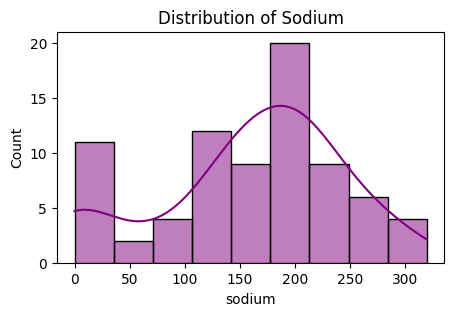

In [49]:
plot_histogram(cereal['sodium'], 'Sodium')

For the contents of sodium, we can observe a normal distribution of our data, showing that 150-250 milligrams of servings for our cereals.

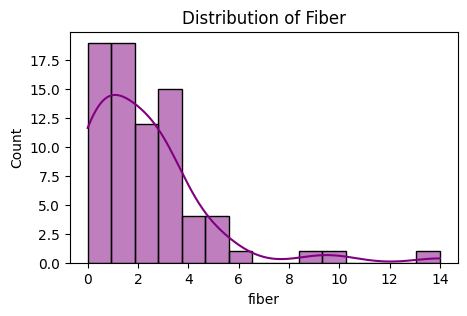

In [50]:
plot_histogram(cereal['fiber'], 'Fiber')

The distribution of dietary fiber content in our cereals exhibits a positive skew in the histogram. Most cereals contain 0 to 6 grams of dietary fiber per serving, with some outliers providing as much as 14 grams of fiber.

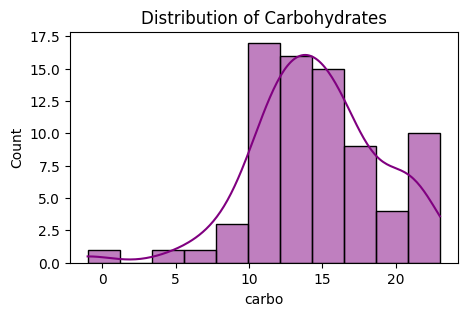

In [51]:
plot_histogram(cereal['carbo'], 'Carbohydrates')

Regarding the distribution of carbohydrates in the dataset, it exhibits a left-skewed distribution or negative skewness. The majority of cereals offer approximately 10-20 grams of complex carbohydrates.

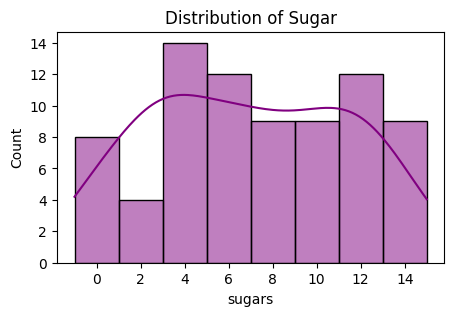

In [52]:
plot_histogram(cereal['sugars'], 'Sugar')

In contrast, the distribution of sugar content in grams shows a uniform distribution, indicating an even distribution of sugar content across our cereals.

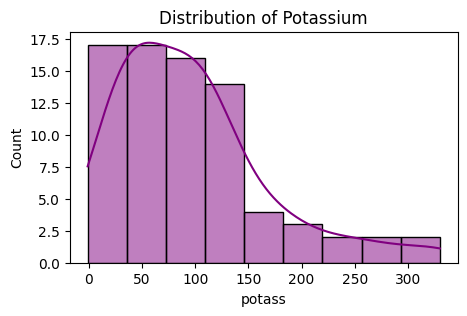

In [53]:
plot_histogram(cereal['potass'], 'Potassium')

The distribution of potassium content in milligrams reveals a right-skewed distribution, with the majority of cereals containing 0-150 milligrams of potassium. However, there are some outliers with values as high as 300 milligrams.

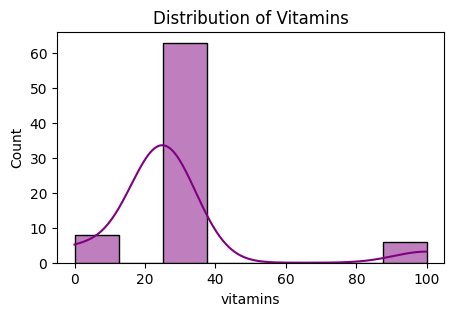

In [54]:
plot_histogram(cereal['vitamins'], 'Vitamins')

In terms of vitamins, the vast majority of cereals contain either 0, 25, or 100 units. These values align with the typical recommended percentages outlined by the FDA on the data card.

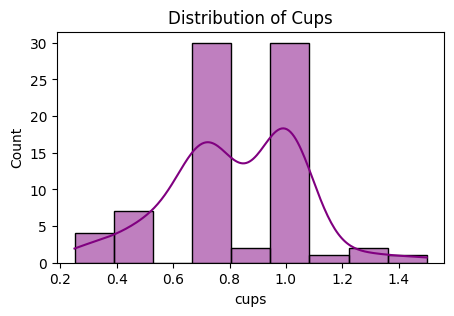

In [55]:
plot_histogram(cereal['cups'], 'Cups')

When we examine the distribution of the number of cups per serving, our data reveals a bimodal distribution. This implies that the majority of cereals typically offer either 0.8 or 1 cup per serving.

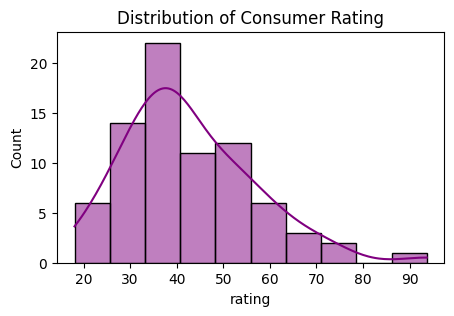

In [56]:
plot_histogram(cereal['rating'], 'Consumer Rating')

The dataset reveals that the majority of cereals have ratings falling within the 30 to 40 point range. However, there are noteworthy outliers with ratings as high as 90 points, resulting in a right-skewed distribution.

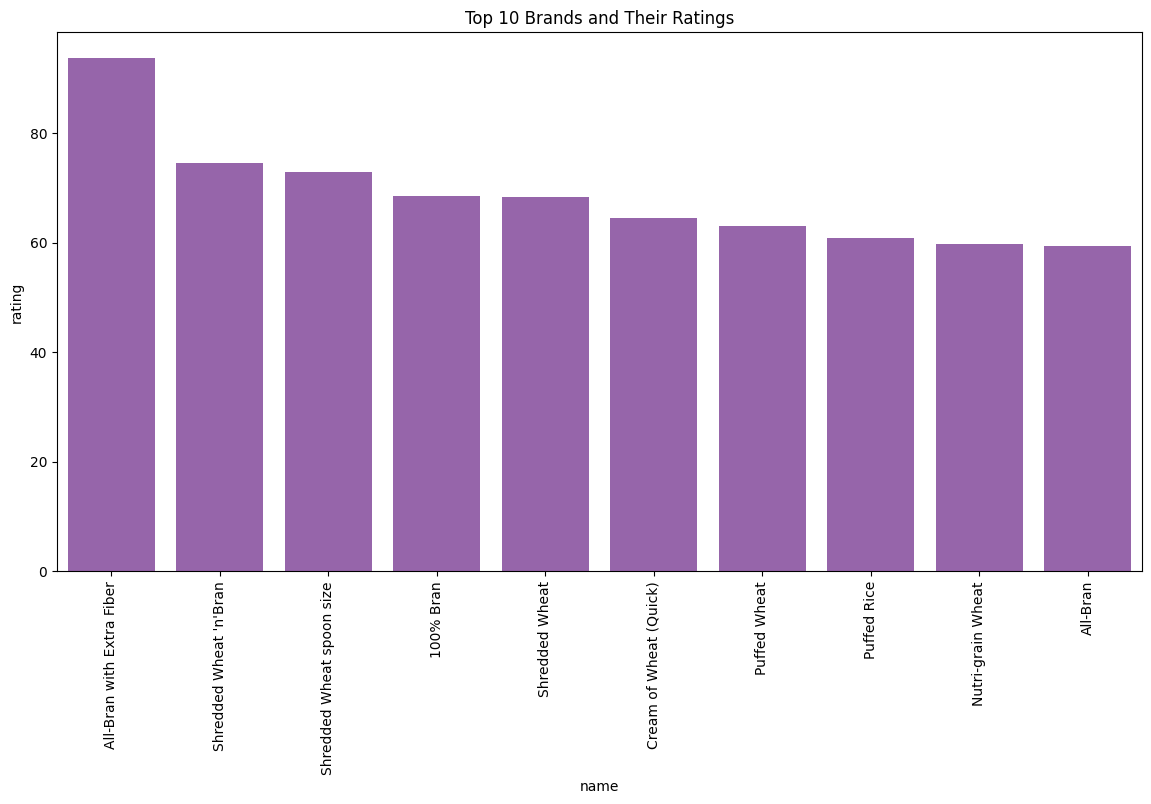

In [67]:
# Define custom palette with purple and pink shades
custom_palette = ["#9b59b6", "#e74c3c"]  # Purple and pink colors

# Set the custom palette for the plot
sns.set_palette(custom_palette)

# Sort the DataFrame by rating in descending order
cereal_sorted = cereal.sort_values(by='rating', ascending=False)

# Select only the top 10 rows
top_10_cereal = cereal_sorted.head(10)

# Create the bar plot with the custom palette for the top 10 brands
plt.figure(figsize=(14, 7))
plt.title("Top 10 Brands and Their Ratings")
plt.xticks(rotation=90)
sns.barplot(data=top_10_cereal, x='name', y='rating')

# Display the plot
plt.show()

Based on our barplot, it seems that the top five brands with the highest ratings are:

1. All-Bran with Extra Fiber
2. Shredded Wheat 'n' Bran
3. Shredded Wheat Spoon Size
4. 100% Bran
5. Shredded Wheat

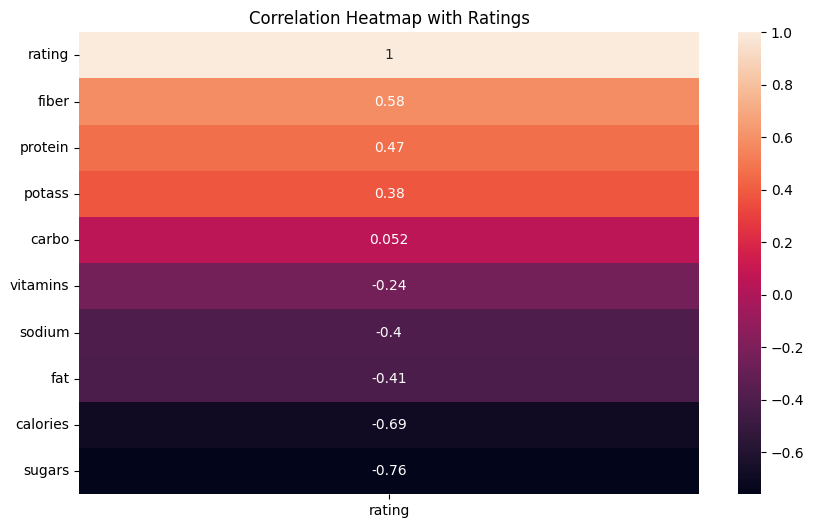

In [21]:
# Exclude non-numeric columns ('name') from the dataframe
numeric_columns = cereal.drop(columns=['name', 'type', 'mfr','shelf', 'cups', 'weight'])

# Create a correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr(method = 'pearson')

# Create a heatmap for correlation with 'rating'
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['rating']].sort_values(by='rating', ascending=False), annot=True)
plt.title("Correlation Heatmap with Ratings")
plt.show()

Our heatmap reveals significant insights into the factors influencing consumer ratings. Fiber, protein, potassium, and carbohydrates exhibit a positive linear relationship with ratings. Conversely, vitamins, sodium, fat, calories, and sugars display a negative correlation, suggesting that consumers tend to favor cereals with lower calorie, fat, and sugar content, while showing a preference for those rich in fiber, protein, potassium, and carbohydrates.

Among these factors, sugars emerge as the most influential for consumers, bearing the lowest negative correlation. In contrast, fiber stands out with the highest positive linear score, indicating a strong inclination toward cereals with higher fiber content.

In our next analysis, we will explore which feature plays the most critical role in predicting cereal ratings using a Random Forest model.

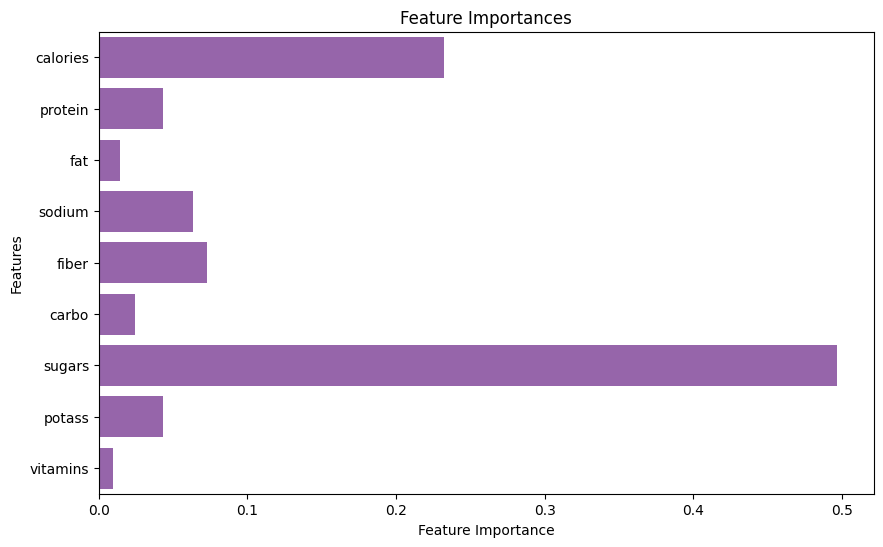

In [66]:
#Let's drop non numerical features for our X variable 
X = cereal.drop(columns=['name', 'type', 'mfr', 'rating','shelf', 'cups', 'weight'])
y = cereal['rating']

#Fit our model
model = RandomForestRegressor()
model.fit(X, y)

#Assign our important features for visualization
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

Through the utilization of a Random Forest Regressor, we gain valuable insights into which features wield the greatest influence on predicting consumer ratings. The bar chart showcases sugars and calories as two pivotal factors contributing to our ability to forecast ratings. Therefore,if ever we develop a machine learning model, sugars and calories emerge as the best candidates for predictor variables. With this, we can ready our data for the first step of Feature Engineering, which is Feature Selection.

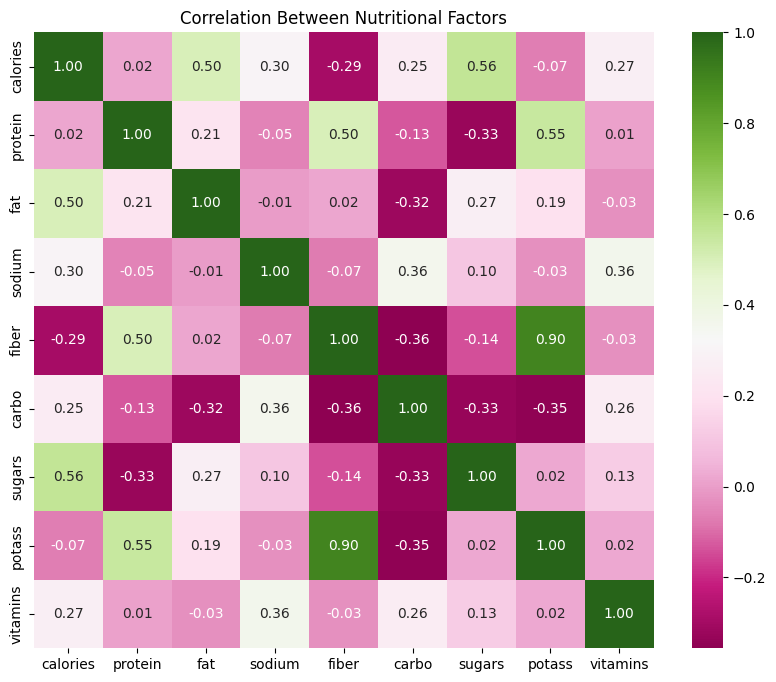

In [68]:
# Select specific columns for correlation
columns_to_correlate = ["calories", "protein", "fat", "sodium", "fiber", "carbo", "sugars", "potass", "vitamins"]

# Calculate correlation matrix
correlation_matrix = cereal[columns_to_correlate].corr()

# Plot correlation matrix as a heatmap with the correct colormap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap="PiYG", fmt=".2f")
plt.title("Correlation Between Nutritional Factors")
plt.show()

In [71]:
# Perform ANOVA test
model = ols('rating ~ C(shelf)', data=cereal).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print(anova_table)

                sum_sq    df         F    PR(>F)
C(shelf)   1719.844015   2.0  4.792833  0.011033
Residual  13276.956385  74.0       NaN       NaN


For the C(shelf) variable with 2 degrees of freedom, the F-statistic is 4.792833, and the p-value (PR(>F)) is 0.011033. Since the p-value is less than 0.05, you can conclude that there is a significant effect of shelf placement on ratings.

=> Shelf number 2

The Residual row represents the unexplained variability within the groups, and the degrees of freedom for residuals are 74. The F-statistic and p-value are not applicable for the residual row because it represents the unexplained variance after accounting for the effect of shelf placement.

In [73]:

# Perform ANOVA to test the effect of shelf placement on sales (assuming 'rating' is a measure of sales)
anova_results = stats.f_oneway(
    cereal[cereal['shelf'] == 1]['rating'],
    cereal[cereal['shelf'] == 2]['rating'],
    cereal[cereal['shelf'] == 3]['rating']
)

# Print the ANOVA results
print("ANOVA Results:")
print("F-statistic:", anova_results.statistic)
print("P-value:", anova_results.pvalue)


ANOVA Results:
F-statistic: 4.792832536750651
P-value: 0.011033084421238076
